## Observations and Insights 

My three observations from the following data are:

* Of the 4 drugs closely analyzed (Capomulin, Ramicane, Infubinol, and Ceftamin) Infubinol and  Ceftamin had the least effectiveness in shrinking the tumor volume (mm3).  Ceftamin was less consistent with a higher IQR than Infubinol (Ceftamin 15.58, Infubinol 11.47) but the upper, lower quartile and median were lower than Infubinol (Ceftamin, upper 64.30, lower 48.72, median 59.85. Infubinol, upper 65.52, lower 54.04, median 60.16). Showing that while less consistent Ceftamin provides better results than Infubinol. Thus, of the 4 drugs analyzed Infubinol is the least effective.

* Of the 4 drugs closely analyzed (Capomulin, Ramicane, Infubinol, and Ceftamin) had the most potential of lowering the most tumor volume. This is because it had the lowest lower quartile of the data set at 31.56 and lowest median at 36.56. Although Ceftamin was more consistent with a IQR of 7.78 compared to Infubinol’s 9.10. Ceftamin also had a higher upper quartile but the difference between the two drugs' upper quartile was 0.49 mm3 . Thus, Ramicane had the biggest potential to lower the size of tumors but was not the most effective across the board.

* There is a strong correlation seen between tumor volume (mm3) and the rats weight. As seen when analyzing the correlation between the 'tumor volume vs. mouse weight for the Capomulin regimen' in the final cell. The r-squared value being 0.71 which indicates a correlation between the two values.



In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import pprint as pprint

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study = mouse_metadata.merge(study_results, on="Mouse ID")
# Display the data table for preview
mouse_study.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
print(f"There are", len(mouse_study.value_counts("Mouse ID")), "mice in the experement")

There are 249 mice in the experement


In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
dupe_mouse_study = mouse_study[mouse_study.duplicated(['Mouse ID', 'Timepoint'])]

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
dupe_mouse_study

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumour Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
    # My comment: Remove each 'Mouse ID' modularly incase a future data set contained more than 1 dupe mouse
dupe_mouse_study_ID = dupe_mouse_study['Mouse ID'].unique().tolist()
for i in range(len(dupe_mouse_study_ID)):
   clean_mouse_df = mouse_study.loc[mouse_study['Mouse ID'] != dupe_mouse_study_ID[i]]

In [6]:
# Checking the number of mice in the clean DataFrame.
print(f"There are", len(clean_mouse_df.value_counts("Mouse ID")), "mice in the experement. After cleaning the data.")

There are 248 mice in the experement. After cleaning the data.


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumour volume. 
# Assemble the resulting series into a single summary dataframe.
tumor_vol_mean = clean_mouse_df.groupby(['Drug Regimen']).mean()['Tumour Volume (mm3)']
tumor_vol_median = clean_mouse_df.groupby(['Drug Regimen']).median()['Tumour Volume (mm3)']
tumor_vol_var = clean_mouse_df.groupby(['Drug Regimen']).var()['Tumour Volume (mm3)']
tumor_vol_std = clean_mouse_df.groupby(['Drug Regimen']).std()['Tumour Volume (mm3)']
tumor_vol_sem = clean_mouse_df.groupby(['Drug Regimen']).sem()['Tumour Volume (mm3)']

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumour volume for each regimen
tumor_df = pd.DataFrame({'Mean': tumor_vol_mean, 'Median': tumor_vol_median, 'Variance': tumor_vol_var,
                        'Standard Deviation': tumor_vol_std, 'SEM': tumor_vol_sem})
tumor_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Using the aggregation method, produce the same summary statistics in a single line
tumor_agg = clean_mouse_df.groupby(['Drug Regimen']).agg(Mean = ('Tumour Volume (mm3)', 'mean'),
                                                        Median = ('Tumour Volume (mm3)', 'median'),
                                                        Variance = ('Tumour Volume (mm3)', 'var'),
                                                        Standard_Deviation =('Tumour Volume (mm3)', 'std'),
                                                        SEM = ('Tumour Volume (mm3)', 'sem'))
tumor_agg

,Mean,Median,Variance,Standard_Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

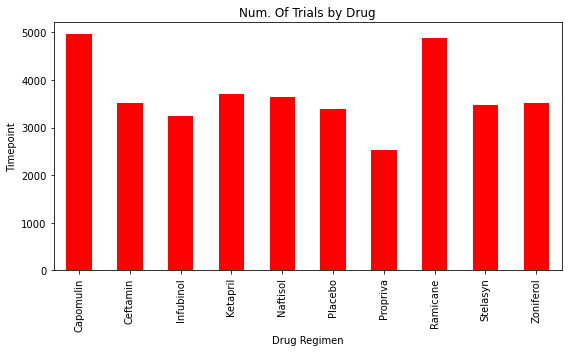

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
mouse_drug_timepoints = clean_mouse_df.groupby(["Drug Regimen"]).sum()["Timepoint"]
mouse_drug_timepoints_plot = mouse_drug_timepoints.plot.bar(ylabel="Timepoint", color = 'r', title = "Num. Of Trials by Drug", figsize = (8, 5), align='center')
plt.tight_layout()
plt.show()

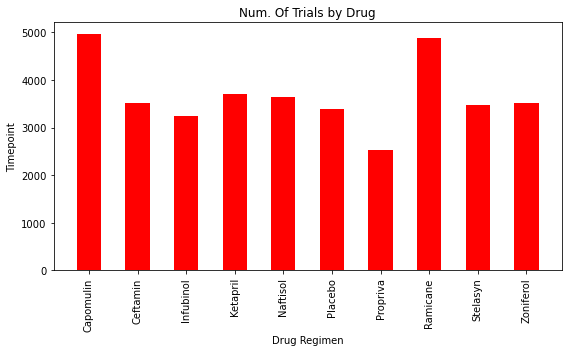

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
mouse_drug_timepoints_index = mouse_drug_timepoints.reset_index()
x_axis = np.arange(len(mouse_drug_timepoints_index))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(8,5))
plt.bar(x_axis, mouse_drug_timepoints_index["Timepoint"], color ='red',width=0.5, align="center")
plt.xticks(tick_locations, mouse_drug_timepoints_index["Drug Regimen"], rotation="vertical")
plt.title("Num. Of Trials by Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint")
plt.tight_layout()
plt.show()

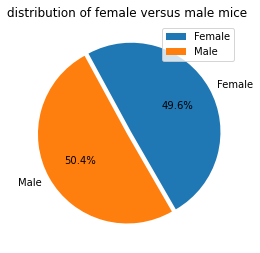

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_groupby_sex = clean_mouse_df.groupby(['Mouse ID','Sex'])
mouse_df = pd.DataFrame(mouse_groupby_sex.size())
mouse_df_sex = pd.DataFrame(mouse_df.groupby(['Sex']).count())
mouse_df_sex.columns = ["Count"]
mouse_df_sex ["Percentage"] = (100*(mouse_df_sex['Count']/mouse_df_sex['Count'].sum()))
mouse_df_sex

mouse_groupby_sex = mouse_study.groupby(['Sex']).count()
pandas_pie = mouse_df_sex.plot.pie(y= 'Percentage', figsize=(4,5), explode= (0.05,0),startangle=300, title = "distribution of female versus male mice",ylabel="",autopct="%1.1f%%")


Text(0.5, 1.0, 'distribution of female versus male mice')

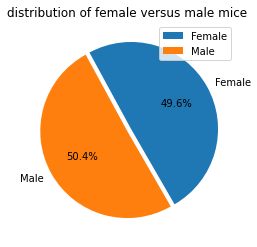

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.pie(mouse_df_sex["Percentage"], explode= (0.05,0),startangle=300,labels=("Female", "Male"),autopct="%1.1f%%")
plt.legend(("Female", "Male"))
plt.title("distribution of female versus male mice")

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

treatments_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
treatment_regimens = []
treatment_merge = []
for drug in treatments_list:
    drug_df = clean_mouse_df.loc[(clean_mouse_df['Drug Regimen'] == drug)]
    drug_df = drug_df.groupby(['Mouse ID']).max()['Timepoint']
    treatment_regimens.append(drug_df)

# Merge this group df with the original dataframe to get the tumour volume at the last timepoint
for x in range(len(treatment_regimens)):
    treatment_merges = pd.merge(treatment_regimens[x], mouse_study, on=("Mouse ID","Timepoint"), how="left")
    treatment_merge.append(treatment_merges)



In [20]:
# Create empty list to fill with tumour vol data (for plotting)
lower_outlier = 0
upper_outlier = 0
Capomulin_tumor_data = treatment_merge[0]
Ramicane_tumor_data = treatment_merge[1]
Infubinol_tumor_data = treatment_merge[2]
Ceftamin_tumor_data = treatment_merge[3]
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatment_merge:
    print(f"+---------------{treatment['Drug Regimen'].unique()}---------------+")
    # Locate the rows which contain mice on each drug and get the tumour volumes and add subset
    quartiles = treatment['Tumour Volume (mm3)'].quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    median = quartiles[0.5]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"The lower quartile of {treatment['Drug Regimen'].unique()} is: {lowerq}")
    print(f"The upper quartile of {treatment['Drug Regimen'].unique()} is: {upperq}")
    print(f"The interquartile range of {treatment['Drug Regimen'].unique()} is: {iqr}")
    print(f"The median of {treatment['Drug Regimen'].unique()} is: {median}")
    # Determine outliers using upper and lower bounds
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    print(f"{treatment['Drug Regimen'].unique()} valuses bellow {lower_bound} could be considered outliers")
    print(f"{treatment['Drug Regimen'].unique()} valuses above {lower_bound} could be considered outliers")    

    

+---------------['Capomulin']---------------+
The lower quartile of ['Capomulin'] is: 32.37735684
The upper quartile of ['Capomulin'] is: 40.1592203
The interquartile range of ['Capomulin'] is: 7.781863460000004
The median of ['Capomulin'] is: 38.1251644
['Capomulin'] valuses bellow 20.70456164999999 could be considered outliers
['Capomulin'] valuses above 20.70456164999999 could be considered outliers
+---------------['Ramicane']---------------+
The lower quartile of ['Ramicane'] is: 31.56046955
The upper quartile of ['Ramicane'] is: 40.65900627
The interquartile range of ['Ramicane'] is: 9.098536719999998
The median of ['Ramicane'] is: 36.56165229
['Ramicane'] valuses bellow 17.912664470000003 could be considered outliers
['Ramicane'] valuses above 17.912664470000003 could be considered outliers
+---------------['Infubinol']---------------+
The lower quartile of ['Infubinol'] is: 54.04860769
The upper quartile of ['Infubinol'] is: 65.52574285
The interquartile range of ['Infubinol'] 

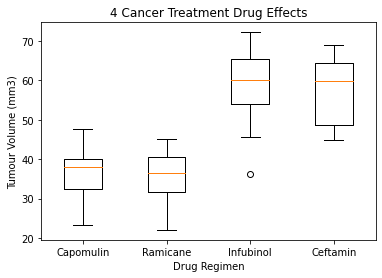

In [16]:
# Generate a box plot of the final tumour volume of each mouse across four regimens of interest
tumor_data = Capomulin_tumor_data['Tumour Volume (mm3)'],Ramicane_tumor_data['Tumour Volume (mm3)'],\
    Infubinol_tumor_data['Tumour Volume (mm3)'],Ceftamin_tumor_data['Tumour Volume (mm3)']
fig1, ax1 = plt.subplots()
ax1.set_title('4 Cancer Treatment Drug Effects')
ax1.set_ylabel('Tumour Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(tumor_data, labels=treatments_list)
plt.show()

## Line and Scatter Plots

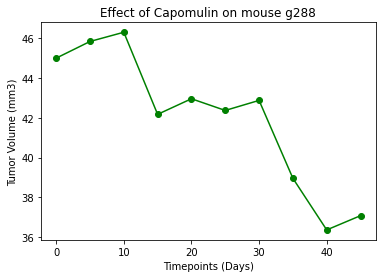

In [17]:
# Generate a line plot of tumour volume vs. time point for a mouse treated with Capomulin
mouse_g288 = clean_mouse_df.loc[clean_mouse_df['Mouse ID'] == 'g288']
plt.plot(mouse_g288['Timepoint'],mouse_g288['Tumour Volume (mm3)'],marker="o",color='g')
plt.xlabel('Timepoints (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title("Effect of Capomulin on mouse g288")
plt.show()

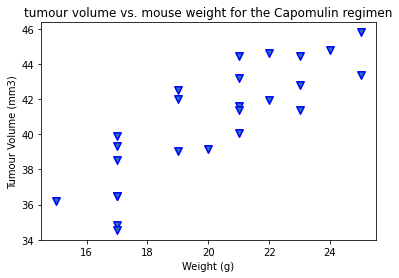

In [18]:
# Generate a scatter plot of average tumour volume vs. mouse weight for the Capomulin regimen
ave_capomlin_tumor = clean_mouse_df.loc[(clean_mouse_df['Drug Regimen'] == 'Capomulin')]
ave_capomlin_tumor = ave_capomlin_tumor.groupby(['Mouse ID']).agg({'Tumour Volume (mm3)': 'mean',
                                                                    'Weight (g)': 'last'})
ave_capomlin_tumor                                                      

y_values = ave_capomlin_tumor['Tumour Volume (mm3)']
x_values = ave_capomlin_tumor['Weight (g)']
plt.scatter(x_values,y_values,s=55, marker='v',linewidths=1.5,edgecolors='b',)
plt.ylabel('Tumour Volume (mm3)')
plt.xlabel('Weight (g)')
plt.title('tumour volume vs. mouse weight for the Capomulin regimen')
plt.show()


## Correlation and Regression

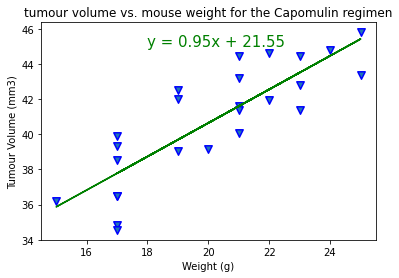

The r-squared is: 0.7088568047708723


In [21]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumour volume for the Capomulin regimen

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values,s=55, marker='v',linewidths=1.5,edgecolors='b',)
plt.plot(x_values,regress_values,"green")
plt.annotate(line_eq,(18,45),fontsize=15,color="green")

plt.ylabel('Tumour Volume (mm3)')
plt.xlabel('Weight (g)')
plt.title('tumour volume vs. mouse weight for the Capomulin regimen')
plt.show()
print(f"The r-squared is: {rvalue**2}")